# 고객 데이터 분석
### 데이터 출처 : UCI Machine Learning Repository

[링크주소 및 다운로드]https://archive.ics.uci.edu/ml/datasets/bank+marketing
<br>

#### Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31

# <데이터 소개>
- 포르투칼 은행에서 마케팅 캠페인을 위해 수집한 자료
- 아웃바운드 텔레마케팅으로 마케팅 캠페인을 진행
- 마케팅 캠페인 방법
   대상 상품: 정기예금 상품
   
   고객의 선정: 정기예금 가입 여부(y)를 타겟으로 하는 분류모형을 이용, 가입 가능성이 높은 고객을 선별
   
   접촉채널: 선정된 고객에 유무선전화를 이용하여 상품 소개 후 정기예금 가입을 권유

# bank client data:
1 - age (나이)(numeric)<br>
2 - job (직업) : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital (결혼상태): marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (교육수준)(categorical: “primary”,“secondary”,“tertiary”, “unknown”)<br>
5 - default (채무불이행 여부) : has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balace (연평균 잔고 Euro)(numeric)<br>
7 - housing (주택대출 여부): has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan (개인대출 여부): has personal loan? (categorical: 'no','yes','unknown')<br>

# related with the last contact of the current campaign:
9 - contact(접촉수단): contact communication type (categorical: 'cellular','telephone') <br>
10 - day(최근 접촉 일): last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - month(최근 접촉 월): last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
12 - duration(최근 접촉에서의 접촉시간): last contact duration, in seconds (numeric). <br>
# other attributes:
13 - campaign(본 캠페인기간 고객 접촉건수): number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays(직전 캠페인에서의 접촉후 경과일수) : number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)<br>
15 - previous(본 캠페인이전 접촉 건수): number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome(직전 캠페인에서의 결과): outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

# Output variable:
17 - y (정기예금 가입여부)- has the client subscribed a term deposit? (binary: 'yes','no')<br>


## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 탐색적 데이터 분석(EDA)
2. 데이터분석
3. 결과해석 

In [1]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import font_manager, rc

In [99]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

### 데이터로드

In [3]:
# ;seperated csv
bank_df = pd.read_csv("bank-full.csv",sep= ";")
print(bank_df.shape)
bank_df

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 1.EDA

### 결측치확인 및 처리

In [4]:
bank_df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 필요없는 변수제거

In [5]:
bank_df= bank_df.drop(["day","pdays"],axis=1)

In [6]:
bank_df.shape

(45211, 15)

### 기술통계량 (수치형 변수)

In [7]:
bank_df.describe()

,age,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323
std,10.618762,3044.765829,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000


### 변수별 분포

In [8]:
from scipy.stats import skew, kurtosis

 - 나이

mean : 40.94, median : 39.00, std : 10.62
skewness : 0.68, kurtosis : 0.32


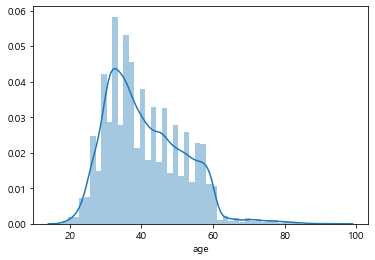

In [9]:
age = bank_df["age"]
sns.distplot(age)
print("mean : %.2f, median : %.2f, std : %.2f"%(age.mean(),age.median(),age.std()))
print("skewness : %.2f, kurtosis : %.2f"%(skew(age),kurtosis(age)))

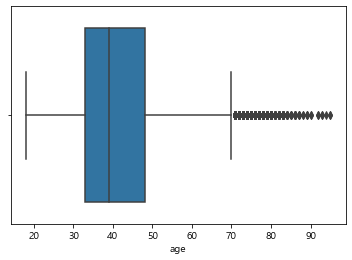

In [10]:
sns.boxplot(age)

- 연평균 잔고(€)

mean : 1362.27, median : 448.00, std : 3044.77
skewness : 8.36, kurtosis : 140.74


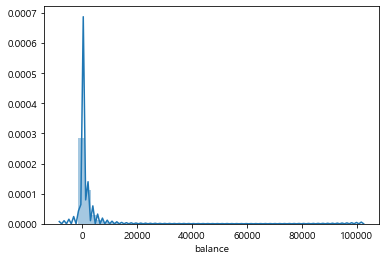

In [11]:
balance = bank_df["balance"]
sns.distplot(balance)
print("mean : %.2f, median : %.2f, std : %.2f"%(balance.mean(),balance.median(),balance.std()))
print("skewness : %.2f, kurtosis : %.2f"%(skew(balance),kurtosis(balance)))

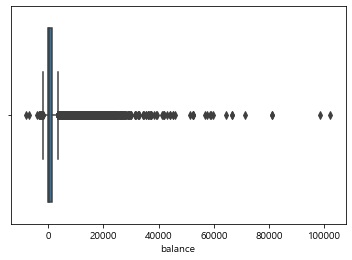

In [12]:
sns.boxplot(balance)

연 평균 잔고의 경우 데이터가 폭넓게 분포하는 것으로보아 고객별 보유잔고의 스펙트럼이 매우 넓음을 확인할 수 있음

In [13]:
# 연령대별 평균 잔고
age_balance = bank_df.iloc[:,[0,5]]
age_balance["age"] =(bank_df["age"]/10).astype(int)*10
age_balance = age_balance.groupby("age").mean()
age_balance

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,balance
age,
10,497.042553
20,990.972828
30,1223.813312
40,1344.992535
50,1687.024257
60,2226.181301
70,2939.790094
80,3257.628099
90,814.333333


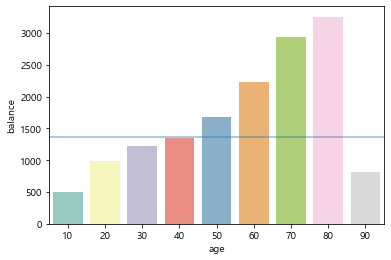

In [14]:
sns.barplot(age_balance.index,age_balance["balance"],palette="Set3")
plt.axhline(1362.27,alpha=0.5)

-> 90대를 제외하고는 연령대가 증가할 수록 연 평균 잔고가 증가하는 경향을 보임

In [15]:
#직업별 평균잔고
job_balance=bank_df.iloc[:,[1,5]]
job_balance=job_balance.groupby("job").mean()
job_balance

,balance
job,
admin.,1135.838909
blue-collar,1078.826654
entrepreneur,1521.470074
housemaid,1392.395161
management,1763.616832
retired,1984.215106
self-employed,1647.970868
services,997.088108
student,1388.060768


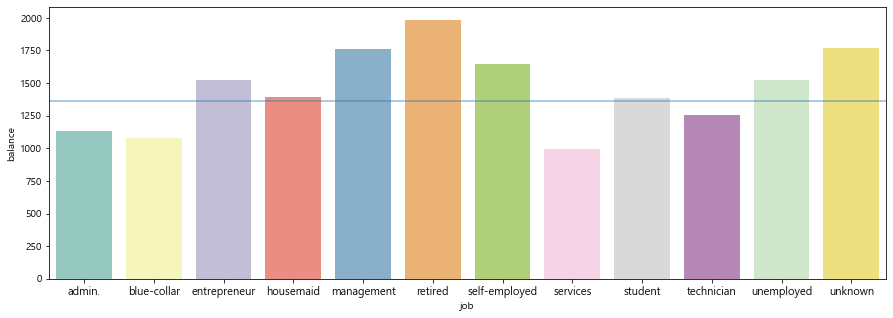

In [16]:
plt.figure(figsize = (15,5))
sns.barplot(job_balance.index,job_balance["balance"],palette="Set3")
plt.xticks(fontsize = 11)
plt.axhline(1362.27,alpha=0.5)

-> 직업별 연 평균잔고를 조사해보면 관리자, blue-collar노동자, 서비스 종사자, 기술자가 전체 평균에 못미치는 잔고를 지니고있음. 한가지 특이사항으로는 학생의 평균잔고가 전체 평균보다 크다는 것. 이는 관측치에 특잇값이 존재할 가능성이 있음

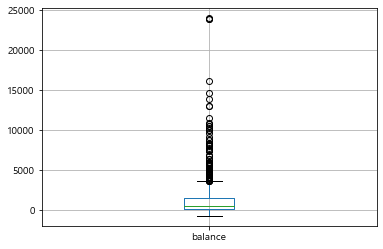

In [17]:
#직업이 학생인 고객의 평균잔고 분포
student_balance = bank_df.iloc[:,[1,5]]
student_balance = student_balance[student_balance["job"]=="student"]
student_balance.boxplot()

-> 위의 상자그림과 같이 직업이 학생인 고객의 경우 특잇값이 많아 학생의 평균잔고가 증가했음을 알 수 있음

-

- 최근 접촉에서 접촉시간

mean : 258.16, median : 180.00, std : 257.53
skewness : 3.14, kurtosis : 18.15


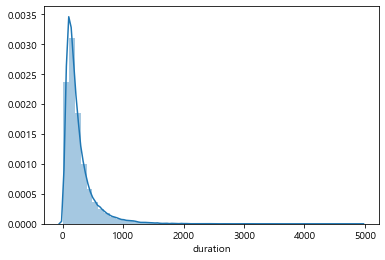

In [18]:
duration = bank_df["duration"]
sns.distplot(duration)
print("mean : %.2f, median : %.2f, std : %.2f"%(duration.mean(),duration.median(),duration.std()))
print("skewness : %.2f, kurtosis : %.2f"%(skew(duration),kurtosis(duration)))

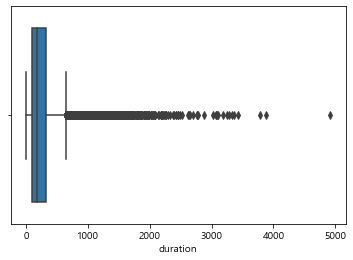

In [19]:
sns.boxplot(duration)

- 캠페인기간 고객접촉 건수

mean : 2.76, median : 2.00, std : 3.10
skewness : 4.90, kurtosis : 39.25


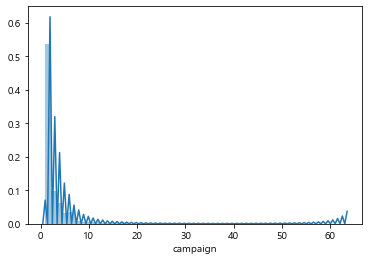

In [20]:
campaign = bank_df["campaign"]
sns.distplot(campaign)
print("mean : %.2f, median : %.2f, std : %.2f"%(campaign.mean(),campaign.median(),campaign.std()))
print("skewness : %.2f, kurtosis : %.2f"%(skew(campaign),kurtosis(campaign)))

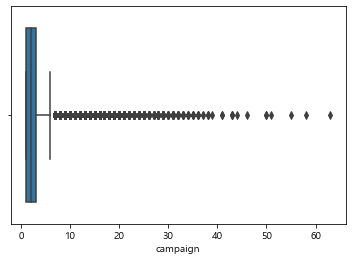

In [21]:
sns.boxplot(campaign)

- 본 캠페인 이전 접촉건수

mean : 0.58, median : 0.00, std : 2.30
skewness : 41.85, kurtosis : 4506.36


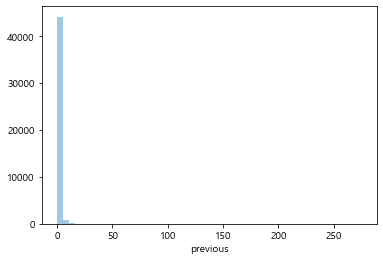

In [22]:
previous = bank_df["previous"]
sns.distplot(previous,kde=False)
print("mean : %.2f, median : %.2f, std : %.2f"%(previous.mean(),previous.median(),previous.std()))
print("skewness : %.2f, kurtosis : %.2f"%(skew(previous),kurtosis(previous)))

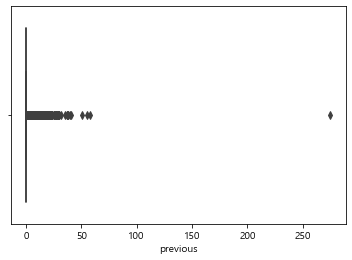

In [23]:
sns.boxplot(previous)

### 빈도파악 (범주형 변수)

 - 직업

In [24]:
job = bank_df["job"].value_counts()
job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

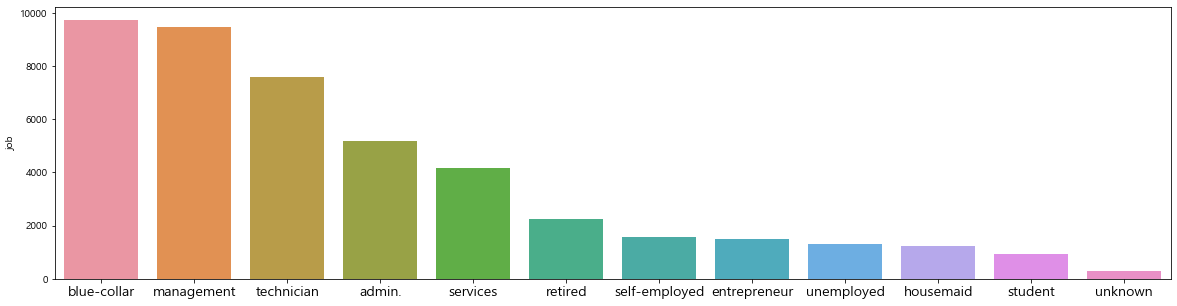

In [25]:
plt.figure(figsize = (20,5))
sns.barplot(job.index, job)
plt.xticks(fontsize = 14)

- 결혼상태

In [26]:
marital = bank_df["marital"].value_counts()
marital

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

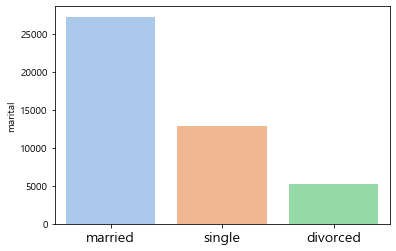

In [27]:
sns.barplot(marital.index, marital,palette="pastel")
plt.xticks(fontsize = 14)

- 교육상태

In [28]:
education = bank_df["education"].value_counts()
education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

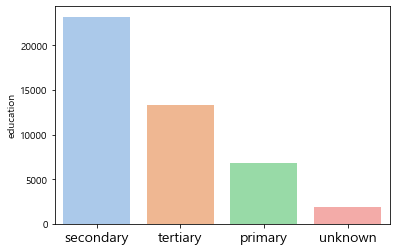

In [29]:
sns.barplot(education.index, education,palette="pastel")
plt.xticks(fontsize = 14)

- 채무 불이행여부

In [30]:
default = bank_df["default"].value_counts()
default

no     44396
yes      815
Name: default, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

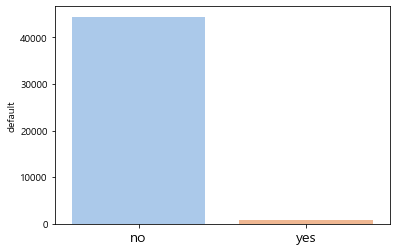

In [31]:
sns.barplot(default.index, default,palette="pastel")
plt.xticks(fontsize = 14)

- 주택 대출여부

In [32]:
loan = bank_df["loan"].value_counts()
loan

no     37967
yes     7244
Name: loan, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

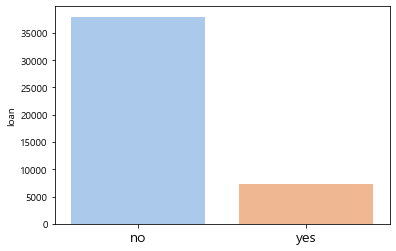

In [33]:
sns.barplot(loan.index, loan,palette="pastel")
plt.xticks(fontsize = 14)

- 접촉수단

In [34]:
contact = bank_df["contact"].value_counts()
contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

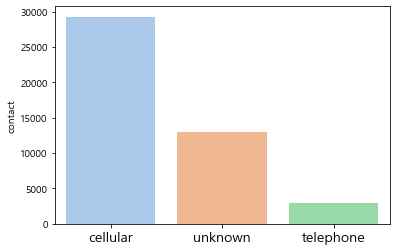

In [35]:
sns.barplot(contact.index, contact,palette="pastel")
plt.xticks(fontsize = 14)

- 최근접촉 월

In [36]:
month = bank_df["month"].value_counts()
month

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

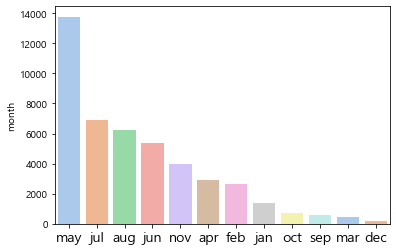

In [37]:
sns.barplot(month.index, month,palette="pastel")
plt.xticks(fontsize = 14)

- 이전 캠페인에서의 결과(정기 예금 가입여부)

In [38]:
poutcome = bank_df["poutcome"].value_counts()
poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

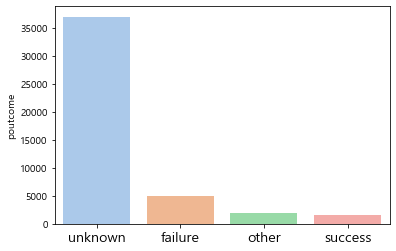

In [39]:
sns.barplot(poutcome.index, poutcome,palette="pastel")
plt.xticks(fontsize = 14)

- y (본캠페인 정기예금 가입여부)

In [40]:
target = bank_df["y"].value_counts()
target

no     39922
yes     5289
Name: y, dtype: int64

([0, 1], <a list of 2 Text xticklabel objects>)

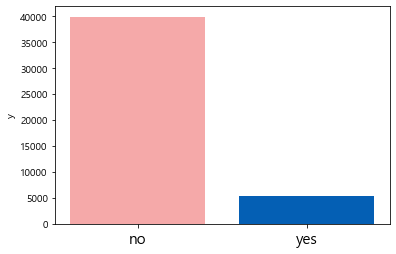

In [41]:
plt.bar(target.index, target,color=["#F5A9A9","#045FB4"])
plt.ylabel("y")
plt.xticks(fontsize = 15)

### 상관관계

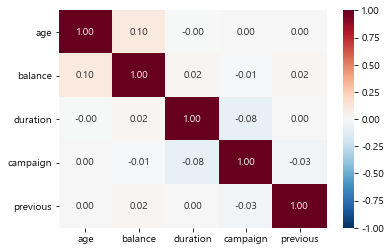

In [42]:
sns.heatmap(bank_df.corr(),
              annot = True, 
            fmt = '.2f',# 실제 값 화면에 나타내기
               cmap = 'RdBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

통계적으로 유의미한 상관관계를 보여주는 변수조합은 없다

## 2. 데이터분석

- 통계적 실험과 유의성검정
- 머신러닝알고리즘 활용 데이터분석 (Naive Bayes, Desicion Tree, Random Forest)

### 통계적 실험과 유의성검정

- 가설설정:
    
    대출이 있는 사람이라면 정기예금 상품에 잘 가입하지 않을 것이다.

- 분석과정 :

    1.가입 여부에따라 가입한 그룹과 가입하지 않은 그룹으로 나눈다.
    
    2.나뉜 데이터를 대출여부에 따라 나눈다.
    
    3.정기예금을 가입한 그룹중 대출이 있는 사람의 비중과 정기예금을 가입하지 않은 그룹중 대출이 있는 사람의 비중을 비교한다 (z-score 비율검정)

In [43]:
# 1번과정
group_df = bank_df.groupby("y")
yes_group = group_df.get_group("yes")
no_group = group_df.get_group("no")

In [44]:
yes = yes_group["loan"].value_counts()
yes

no     4805
yes     484
Name: loan, dtype: int64

In [45]:
no = no_group["loan"].value_counts()
no

no     33162
yes     6760
Name: loan, dtype: int64

In [46]:
portion_yes = yes/yes.sum()
portion_no = no/no.sum()

In [47]:
portion_yes.name = "y_yes"
portion_no.name = "y_no"
pd.concat([portion_yes,portion_no],axis=1)

,y_yes,y_no
no,0.908489,0.83067
yes,0.091511,0.16933


### z-score 비율검정
#### 비율검정을 통해 두 집단간의 비율(대출이 없는 고객비율)차이가 통계적으로 유의미한지 확인 

귀무가설 : 정기예금을 가입한 그룹의 대출이 없을 확률이 정기예금을 가입하지 않은 그룹의 대출이 없을 확률보다 더 크지 않다.

대립가설 : 정기예금을 가입한 그룹의 대출이 없을 확률이 정기예금을 가입하지 않은 그룹의 대출이 없을 확률보다 더 크다.

In [48]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([4805,33162])
nobs = np.array([4805+484,33162+6760])
stat,pval = proportions_ztest(count,nobs,alternative="larger")

In [49]:
print(pval)

6.227400336880118e-48


비율검정 결과 p-value가 통계적 유의수준인 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 
   
따라서 정기예금을 가입한 고객일수록 대출이 없을 확률이 높다.

### 머신러닝알고리즘 활용 데이터분석

- 분석목표

y를 타겟으로하고 나머지 16개의 feature들을 독립변수로하여 독립변수의 값들을 통해 관측치의 y값을 예측하는 머신러닝 모델을 생성한다.

해당 머신러닝 모델의 성능을 평가하고 각 독립변수가 관측치의 y값(정기 예금상품 가입여부)을 결정짓는데 어떠한 영향을 미치는 지 파악하여 마케팅 전략으로 활용할만한 인사이트를 도출한다.


- 분석과정

 1. train,test 데이터 셋 분리 (7:3)

 2. 모델 생성 및 적합

 3. 예측 및 성능평가

 4. 결과해석


#### feature, target 설정

In [50]:
features = bank_df.drop(["y"],axis=1)

In [51]:
features

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,0,unknown


#### 범주형 변수 더미변수화(원-핫 인코딩)

In [52]:
features= pd.get_dummies(features)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   previous             45211 non-null  int64
 5   job_admin.           45211 non-null  uint8
 6   job_blue-collar      45211 non-null  uint8
 7   job_entrepreneur     45211 non-null  uint8
 8   job_housemaid        45211 non-null  uint8
 9   job_management       45211 non-null  uint8
 10  job_retired          45211 non-null  uint8
 11  job_self-employed    45211 non-null  uint8
 12  job_services         45211 non-null  uint8
 13  job_student          45211 non-null  uint8
 14  job_technician       45211 non-null  uint8
 15  job_unemployed       45211 non-null  uint8
 16  job_unknown          4

#### target 변수 이진범주화

- yes ->1, no ->0

In [53]:
change_target = {"yes":1,"no":0}
target = bank_df["y"].apply(lambda x: change_target[x])
target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

#### train, test set분리

In [54]:
# train : test = 7 : 3
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features,target,random_state = 2021)
print(train_x.shape)
print(test_x.shape)
print()
print(train_y.shape)
print(test_y.shape)

(33908, 49)
(11303, 49)

(33908,)
(11303,)


## Naive Bayes

### 모델학습

In [55]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

### 예측 

In [56]:
pred = nb_clf.predict(test_x)

### 성능평가

*분류모델의 성능 측정지표에 관한글 

출처 : https://nittaku.tistory.com/295

In [57]:
from sklearn.metrics import confusion_matrix,classification_report , accuracy_score , recall_score , precision_score ,f1_score
from yellowbrick.classifier import ROCAUC

- 정확도 , 재현율 , 정밀도

In [58]:
accr_nb= accuracy_score(test_y,pred)
rec_nb = recall_score(test_y,pred)
prec_nb = precision_score(test_y,pred)
f1_score_nb = f1_score(test_y,pred) 

print(f"정확도 : {accr_nb}")
print(f"재현율 : {rec_nb}")
print (f"정밀도 : {prec_nb}")
print (f"F-1 : {f1_score_nb}")

정확도 : 0.854109528443776
재현율 : 0.5382899628252789
정밀도 : 0.4132420091324201
F-1 : 0.4675492412011624


-> 나이브 베이즈 모델의 성능을 보면 전체적인 정확도는 높다. 하지만 재현율이 약 0.54 정밀도가 약 0.41에 불과한 것으로 보아 실제 타겟이1인 데이터를 잘 분류하지 못함을 알 수 있음. 즉 실제 고객의 특성(feature)을 바탕으로 해당 고객이 정기예금 상품을 가입할 것인지 아닌지 분류하는 문제에 있어서 나이브베이즈 모델이 정기예금 상품을 가입할 고객집단을 잘 분류하지 못한다는 것을 알 수 있다.

- 혼동행렬

In [59]:
confusion_matrix(test_y,pred)

array([[8930, 1028],
       [ 621,  724]], dtype=int64)

- 종합

In [60]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      9958
           1       0.41      0.54      0.47      1345

    accuracy                           0.85     11303
   macro avg       0.67      0.72      0.69     11303
weighted avg       0.87      0.85      0.86     11303



C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


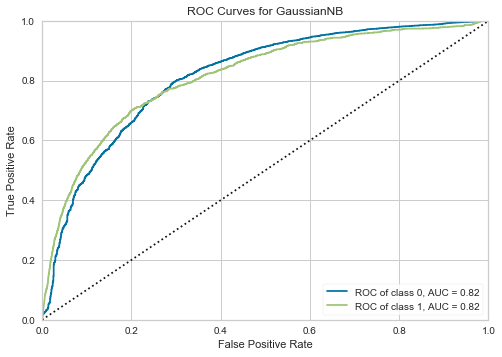

In [61]:
visualizer = ROCAUC(nb_clf,classes = [0,1],micro=False,macro = False)
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

 classification_report 결과와 ROC커브 AUC 값을 통해 알 수 있는 것처럼 정확도와 AUC 값자체는 준수한 수준으로 나이브 베이즈 모델이 성능이 그리 낮은 분류기는 아니다. 타겟이 0인 값에대해서는 precision과 recall이 각각 0.93과 0.90으로 정기예금에 가입하지 않을 고객들은 잘 분류함을 알 수 있다. 하지만 타겟이 1인 값에 대해서는 f-1 score가 0.47에 불과하듯이 정기예금에 가입할 고객은 분류를 잘 못함을 알 수 있다. 따라서 마케팅 캠페인의 목적을 고려할때 해당 나이브 베이즈 분류기는 별로 도움이 되지않는다. 해당 마케팅 캠페인의 목적은 정기예금 상품 가입률을 증가 시키는 것이 목적으로 해당 상품을 가입하는 고객은 어떠한 특성을 지니는지 파악하여 해당 특성을 지닌 고객들을 세분화하여 타켓층으로 삼기 위함이다. 하지만 나이브베이즈 분류모델로는 해당 목적에 부합하는 인사이트를 도출하기 힘들다. 

하지만 관측치의 타겟을 결정 짓는 데, 어떠한 변수들이 상대적으로 중요하게 작용하는 지 파악하여, 향후 마케팅 캠페인을 진행하는 데 있어서 주의깊게 관찰해야할 고객특성들을 파악해보았다.

변수중요도를 측정하기위해 사용한 방법은 permutation_importance 알고리즘으로 특정 변수의 값을 랜덤하게 섞어 해당 변수가 예측에 미치는 모든 영향력을 제거했을 때,이러한 데이터로 학습시킨 모델의 정확도가 얼마나 감소하는지 교차 검증하여 측정한다

### 변수중요도

In [62]:
from sklearn.inspection import permutation_importance

In [63]:
result_nb = permutation_importance(nb_clf, train_x, train_y, n_repeats=10,
                             random_state=2021)

In [64]:
df_nb=pd.DataFrame(result_nb["importances_mean"])
df_nb.rename(columns = {0:"중요도"},inplace = True)
df_nb.rename(index = {0:"age ",1:"balance",2:"duration",3:"campaign",4:"previous",5:"job_admin.",6:"job_blue-collar",7:"job_entrepreneur",
                  8:"job_housemaid",9:"job_management",10:"job_retired",11:"job_self-employed",12:"job_services",13:"job_student",
                  14:"job_technician",15:"job_unemployed",16:"job_unknown",17:"marital_divorced",18:"marital_married",19:"marital_single",
                  20:"education_primary",21:"education_secondary",22:"education_tertiary",23:"education_unknown",24:"default_no",25:"default_yes",
                  26:"housing_no",27:"housing_yes",28:"loan_no",29:"loan_yes",30:"contact_cellular",31:"contact_telephone",32:"contact_unknown",
                  33:"month_apr",34:"month_aug",35:"month_dec",36:"month_feb",37:"month_jan",38:"month_jul",39:"month_jun",40:"month_mar",41:"month_may",
                  42:"month_nov",43:"month_oct",44:"month_sep",45:"poutcome_failure",46:"poutcome_other",47:"poutcome_success",48:"poutcome_unknown"},inplace=True)
df_nb=df_nb.sort_values(by = "중요도",ascending = False)

In [65]:
df_nb

,중요도
poutcome_success,0.024664
duration,0.019022
month_oct,0.009284
month_sep,0.007225
month_mar,0.007125
month_dec,0.002760
job_student,0.002409
job_retired,0.001262
education_primary,0.000622
housing_yes,0.000599


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

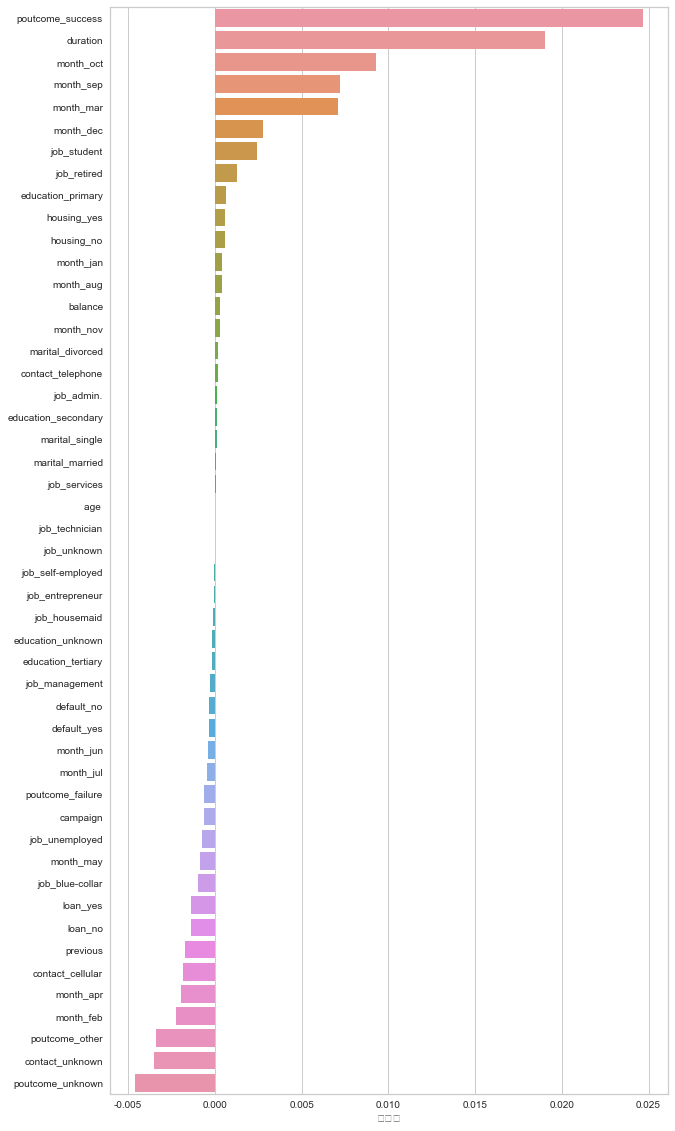

In [66]:
fig = plt.figure(figsize=(10,20))
sns.barplot( x= df_nb["중요도"],y = df_nb.index ,)

중요변수 상위 10개 항목을 살펴보면 1.직전 캠페인에서의 결과(직전 캠페인에서 정기예금 상품을 가입했는지), 2.최근 접촉에서의 접촉시간, 3.접촉 월, 4.직업, 5.주택담보대출여부 순임을 알 수 있다.

## Desicion Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### 모델학습

In [68]:
tree_clf = DecisionTreeClassifier()
param_dict = {"criterion":["gini","entropy"],
              "max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[5,10,15,20,25,30],}

In [69]:
#GridSearchCV : 성능이 가장 우수한 하이퍼마라미터를 반환
grid_tree= GridSearchCV(tree_clf,param_grid=param_dict,refit=True,return_train_score=True)
grid_tree.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [70]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}

In [71]:
tree_clf = DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_split=5)
tree_clf.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 예측

In [72]:
pred_tree = tree_clf.predict(test_x)

### 성능평가

In [73]:
accr_tree= accuracy_score(test_y,pred_tree)
rec_tree = recall_score(test_y,pred_tree)
prec_tree = precision_score(test_y,pred_tree)
f1_score_tree = f1_score(test_y,pred_tree) 

print(f"정확도 : {accr_tree}")
print(f"재현율 : {rec_tree}")
print (f"정밀도 : {prec_tree}")
print (f"F-1 : {f1_score_tree}")

정확도 : 0.8979916836238166
재현율 : 0.30408921933085503
정밀도 : 0.6533546325878594
F-1 : 0.4150177574835109


In [74]:
confusion_matrix(test_y,pred_tree)

array([[9741,  217],
       [ 936,  409]], dtype=int64)

In [75]:
print(classification_report(test_y,pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9958
           1       0.65      0.30      0.42      1345

    accuracy                           0.90     11303
   macro avg       0.78      0.64      0.68     11303
weighted avg       0.88      0.90      0.88     11303



C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


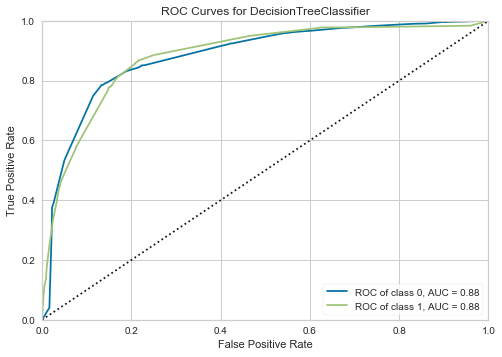

In [76]:
visualizer = ROCAUC(tree_clf,classes = [0,1],micro=False,macro = False)
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

Decision Tree모델의 정확도와 AUC값은 나이브베이즈 모델보다 높으나 나이브베이즈 모델과 마찬가지로 실제 타겟이 1인 데이터를 잘 분류하지 못함을 알 수 있다. Decision Tree모델역시 실제 정기예금을 가입할 고객들을 잘 분류하지 못한다.

### Tree 시각화

In [77]:
import graphviz
import pydot
from sklearn import tree

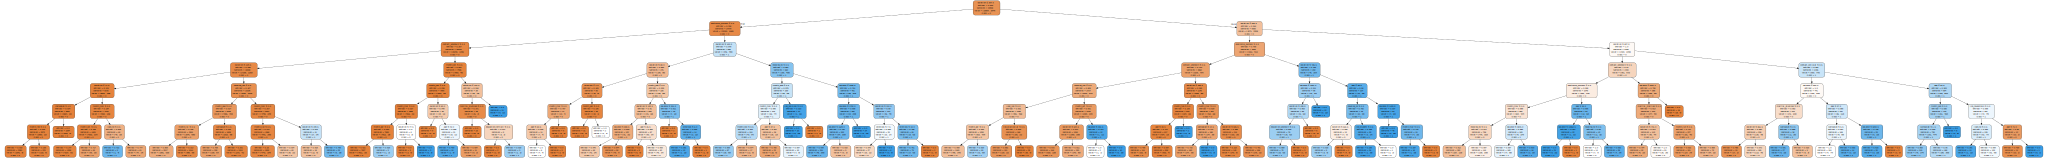

In [78]:
dot_data = tree.export_graphviz(tree_clf,out_file=None,feature_names=train_x.columns,
                                class_names=["0","1"]
                
                     ,filled=True
                     ,rounded=2,
                     special_characters=True
                    ) #filled: 색상채우기 , rounded = 반올림 , special_characters : 특수문자 대비
graphviz.Source(dot_data)

In [79]:
graph_data= tree.export_graphviz(tree_clf,out_file = "desicion_tree.dot",feature_names=train_x.columns,
                          class_names=["0","1"], filled=True)
(graph,)= pydot.graph_from_dot_file("desicion_tree.dot",encoding = "utf-8")
graph.write_png("decision_tree.png")

### 변수 중요도

In [81]:
#불순도 감소기준
df_tree1=pd.DataFrame(tree_clf.feature_importances_)
df_tree1.rename(columns = {0:"중요도"},inplace = True)
df_tree1.rename(index = {0:"age ",1:"balance",2:"duration",3:"campaign",4:"previous",5:"job_admin.",6:"job_blue-collar",7:"job_entrepreneur",
                  8:"job_housemaid",9:"job_management",10:"job_retired",11:"job_self-employed",12:"job_services",13:"job_student",
                  14:"job_technician",15:"job_unemployed",16:"job_unknown",17:"marital_divorced",18:"marital_married",19:"marital_single",
                  20:"education_primary",21:"education_secondary",22:"education_tertiary",23:"education_unknown",24:"default_no",25:"default_yes",
                  26:"housing_no",27:"housing_yes",28:"loan_no",29:"loan_yes",30:"contact_cellular",31:"contact_telephone",32:"contact_unknown",
                  33:"month_apr",34:"month_aug",35:"month_dec",36:"month_feb",37:"month_jan",38:"month_jul",39:"month_jun",40:"month_mar",41:"month_may",
                  42:"month_nov",43:"month_oct",44:"month_sep",45:"poutcome_failure",46:"poutcome_other",47:"poutcome_success",48:"poutcome_unknown"},inplace=True)
df_tree1=df_tree1.sort_values(by = "중요도",ascending = False)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

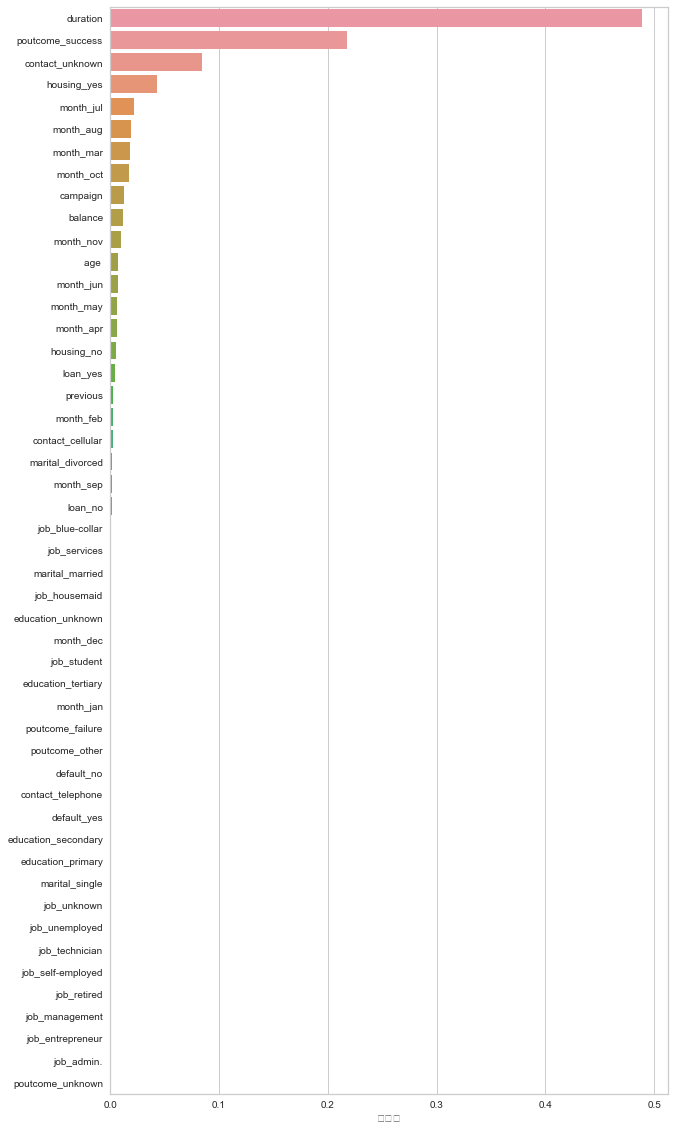

In [82]:
fig = plt.figure(figsize=(10,20))
sns.barplot( x= df_tree1["중요도"],y = df_tree1.index ,)

In [83]:
#정확도 감소기준
result_tree = permutation_importance(tree_clf, train_x, train_y, n_repeats=10,
                             random_state=2021)
df_tree2=pd.DataFrame(result_tree["importances_mean"])
df_tree2.rename(columns = {0:"중요도"},inplace = True)
df_tree2.rename(index = {0:"age ",1:"balance",2:"duration",3:"campaign",4:"previous",5:"job_admin.",6:"job_blue-collar",7:"job_entrepreneur",
                  8:"job_housemaid",9:"job_management",10:"job_retired",11:"job_self-employed",12:"job_services",13:"job_student",
                  14:"job_technician",15:"job_unemployed",16:"job_unknown",17:"marital_divorced",18:"marital_married",19:"marital_single",
                  20:"education_primary",21:"education_secondary",22:"education_tertiary",23:"education_unknown",24:"default_no",25:"default_yes",
                  26:"housing_no",27:"housing_yes",28:"loan_no",29:"loan_yes",30:"contact_cellular",31:"contact_telephone",32:"contact_unknown",
                  33:"month_apr",34:"month_aug",35:"month_dec",36:"month_feb",37:"month_jan",38:"month_jul",39:"month_jun",40:"month_mar",41:"month_may",
                  42:"month_nov",43:"month_oct",44:"month_sep",45:"poutcome_failure",46:"poutcome_other",47:"poutcome_success",48:"poutcome_unknown"},inplace=True)
df_tree2=df_tree2.sort_values(by = "중요도",ascending = False)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

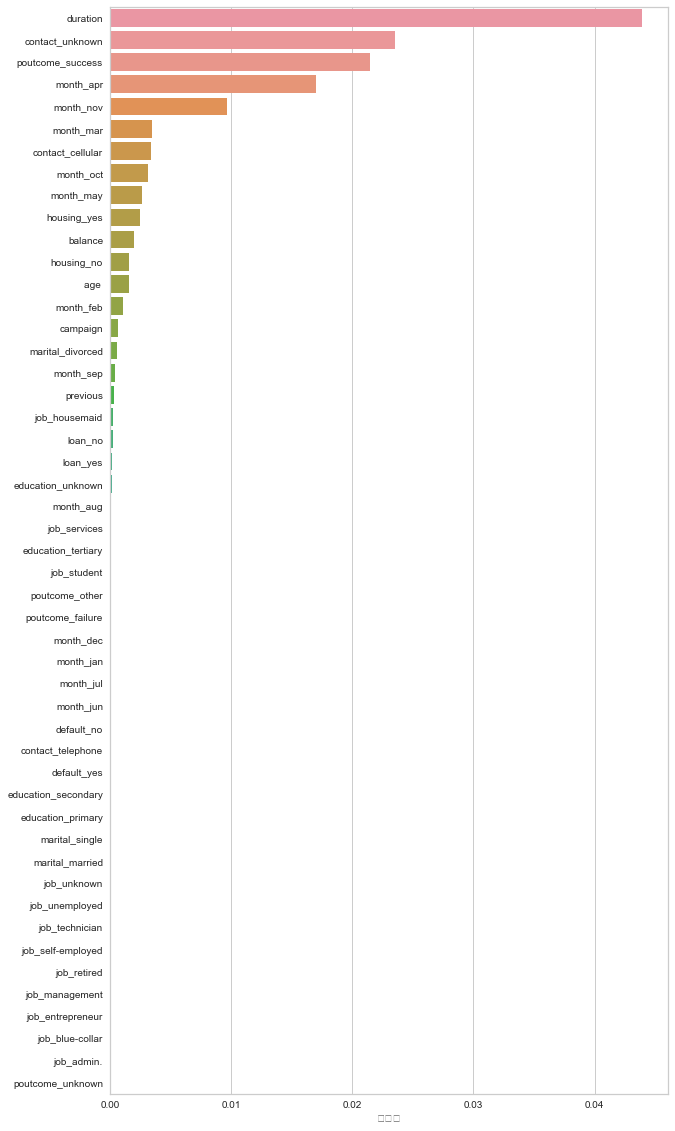

In [84]:
fig = plt.figure(figsize=(10,20))
sns.barplot( x= df_tree2["중요도"],y = df_tree2.index )

불순도감소와 정확도감소 두 기준 모두고려하였을 때, 상위 중요변수 10개 항목은 1.접촉시간, 2.이전 캠페인에서의 결과, 3.접촉 월 4.직업, 5.주택담보 대출여부, 6.직업, 7.접촉 건수이다.

### RandomForest 

### 모델학습

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 예측

In [86]:
pred_rf = rf_clf.predict(test_x)

### 성능평가

In [87]:
accr_rf= accuracy_score(test_y,pred_rf)
rec_rf = recall_score(test_y,pred_rf)
prec_rf = precision_score(test_y,pred_rf)
f1_score_rf = f1_score(test_y,pred_rf) 

print(f"정확도 : {accr_rf}")
print(f"재현율 : {rec_rf}")
print (f"정밀도 : {prec_rf}")
print (f"F-1 : {f1_score_rf}")

정확도 : 0.904007785543661
재현율 : 0.40148698884758366
정밀도 : 0.6585365853658537
F-1 : 0.4988452655889145


In [88]:
confusion_matrix(test_y,pred_rf)

array([[9678,  280],
       [ 805,  540]], dtype=int64)

In [89]:
print(classification_report(test_y,pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9958
           1       0.66      0.40      0.50      1345

    accuracy                           0.90     11303
   macro avg       0.79      0.69      0.72     11303
weighted avg       0.89      0.90      0.89     11303



C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


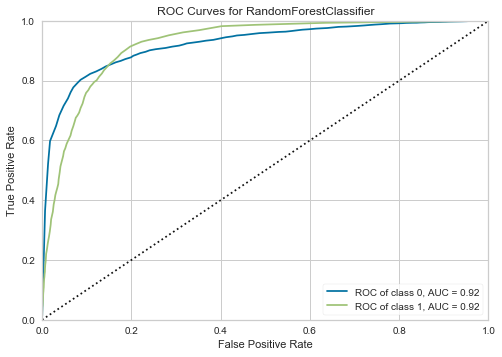

In [90]:
visualizer = ROCAUC(rf_clf,classes = [0,1],micro=False,macro = False)
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.show()

정확도와 AUC값은 각각 0.91과 0.92로 높은 편이나 target 1에 대한 precision, recall,f-1 score은 각각 0.66,0.40,0.51로 다른 모델과 마찬가지로 정기예금 상품을 가입할 고객들은 잘 분류하지 못함을 알 수 있다.

### 변수중요도

In [91]:
#불순도 감소기준
df_rf1=pd.DataFrame(rf_clf.feature_importances_)
df_rf1.rename(columns = {0:"중요도"},inplace = True)
df_rf1.rename(index = {0:"age ",1:"balance",2:"duration",3:"campaign",4:"previous",5:"job_admin.",6:"job_blue-collar",7:"job_entrepreneur",
                  8:"job_housemaid",9:"job_management",10:"job_retired",11:"job_self-employed",12:"job_services",13:"job_student",
                  14:"job_technician",15:"job_unemployed",16:"job_unknown",17:"marital_divorced",18:"marital_married",19:"marital_single",
                  20:"education_primary",21:"education_secondary",22:"education_tertiary",23:"education_unknown",24:"default_no",25:"default_yes",
                  26:"housing_no",27:"housing_yes",28:"loan_no",29:"loan_yes",30:"contact_cellular",31:"contact_telephone",32:"contact_unknown",
                  33:"month_apr",34:"month_aug",35:"month_dec",36:"month_feb",37:"month_jan",38:"month_jul",39:"month_jun",40:"month_mar",41:"month_may",
                  42:"month_nov",43:"month_oct",44:"month_sep",45:"poutcome_failure",46:"poutcome_other",47:"poutcome_success",48:"poutcome_unknown"},inplace=True)
df_rf1=df_rf1.sort_values(by = "중요도",ascending = False)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

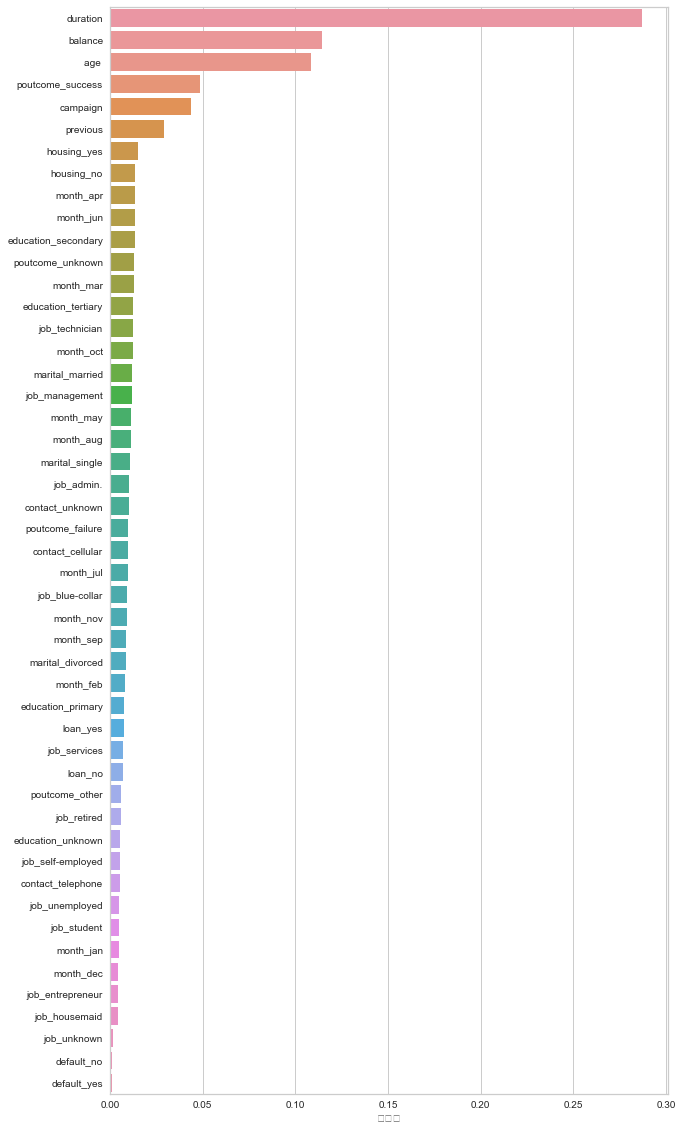

In [92]:
fig = plt.figure(figsize=(10,20))
sns.barplot( x= df_rf1["중요도"],y = df_rf1.index )

In [93]:
result_rf = permutation_importance(nb_clf, train_x, train_y, n_repeats=10,
                             random_state=2021)
df_rf2=pd.DataFrame(result_rf["importances_mean"])
df_rf2.rename(columns = {0:"중요도"},inplace = True)
df_rf2.rename(index = {0:"age ",1:"balance",2:"duration",3:"campaign",4:"previous",5:"job_admin.",6:"job_blue-collar",7:"job_entrepreneur",
                  8:"job_housemaid",9:"job_management",10:"job_retired",11:"job_self-employed",12:"job_services",13:"job_student",
                  14:"job_technician",15:"job_unemployed",16:"job_unknown",17:"marital_divorced",18:"marital_married",19:"marital_single",
                  20:"education_primary",21:"education_secondary",22:"education_tertiary",23:"education_unknown",24:"default_no",25:"default_yes",
                  26:"housing_no",27:"housing_yes",28:"loan_no",29:"loan_yes",30:"contact_cellular",31:"contact_telephone",32:"contact_unknown",
                  33:"month_apr",34:"month_aug",35:"month_dec",36:"month_feb",37:"month_jan",38:"month_jul",39:"month_jun",40:"month_mar",41:"month_may",
                  42:"month_nov",43:"month_oct",44:"month_sep",45:"poutcome_failure",46:"poutcome_other",47:"poutcome_success",48:"poutcome_unknown"},inplace=True)
df_rf2=df_rf2.sort_values(by = "중요도",ascending = False)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current fon

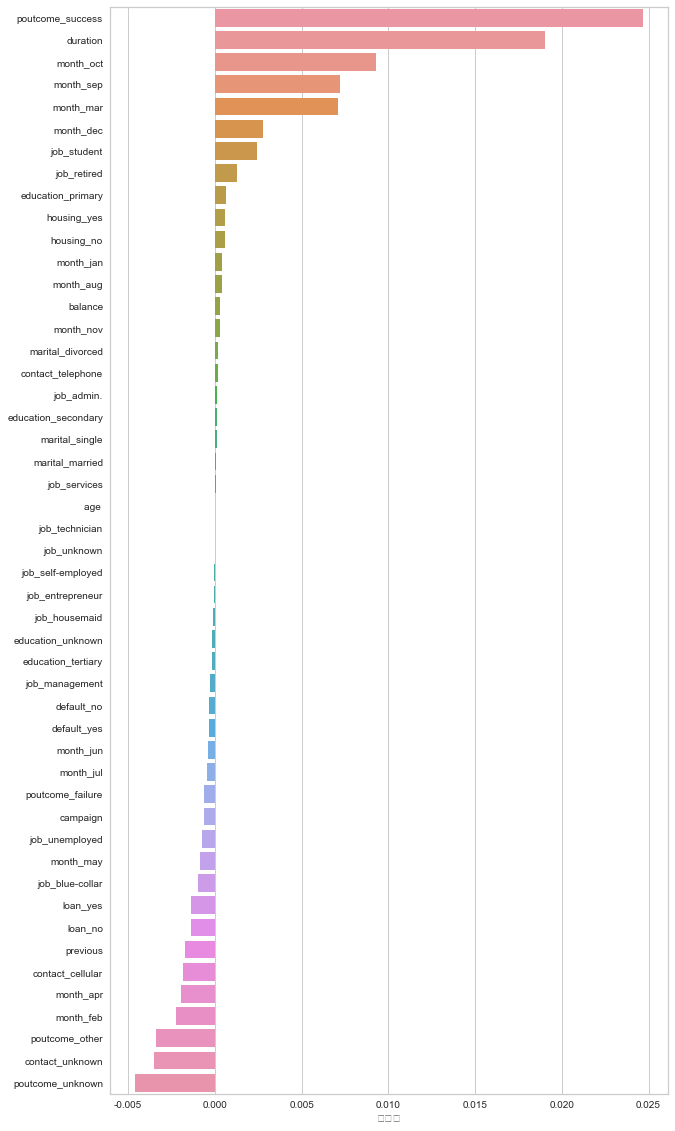

In [94]:
fig = plt.figure(figsize=(10,20))
sns.barplot( x= df_rf2["중요도"],y = df_rf2.index )

정확도를 기준으로 하였을 때 변수중요도가 높은 상위변수는 1.이전 캠페인에서의 결과, 2.접촉시간,  3.접촉 월 4.직업,5.직업 6.교육수준,7.주택담보 대출여부등으로 이전 모델의 결과와 거의 유사하고 불순도를 기준으로 하였을 때는 1.계좌잔고, 2.나이, 3.캠페인이전 접촉건수 변수들이 새롭게 상위 중요변수를 차지함을 알 수 있다.

## 3.결과해석

In [95]:
result_df= pd.DataFrame({
    "NB":[accr_nb,prec_nb,rec_nb,f1_score_nb],
             "DT":[accr_tree,prec_tree,rec_tree,f1_score_tree],
             "RF":[accr_rf,prec_rf,rec_rf,f1_score_rf]
    })
result_df.rename(index = {0:"Accuracy",1:"Precision",2:"Recall",3:"F-1 score"},inplace =1)
result = result_df.round(3)
result

,NB,DT,RF
Accuracy,0.854,0.898,0.904
Precision,0.413,0.653,0.659
Recall,0.538,0.304,0.401
F-1 score,0.468,0.415,0.499


NaiveBayes, DecisionTree, RandomForest 세 개의 머신러닝 모델을 사용하여 분석을 진행한 결과 세 모델 모두 정기예금 상품을 가입하지 않는 고객들은 잘 분류하지만 정기예금 상품을 가입한 고객들은 잘 분류하지 못하였다.

따라서 정기예금 상품을 가입한 고객들의 특성을 파악하여 향후 마케팅 캠페인을 진행함에있어서 주 타켓층이 되는 고객을 선별하고자 하는 마케팅 목적에 있어서는 세 분류모델이 큰 인사이트를 제공하진 못하였지만 세 분류모델이 분류를 진행하는 데 있어서 분류결과에 유의미한 영향을 미쳤던 변수들이 무엇이었는지를 파악함으로써 중점적으로 체크해야할 고객특성을 파악해보았다.

<Figure size 1440x360 with 0 Axes>

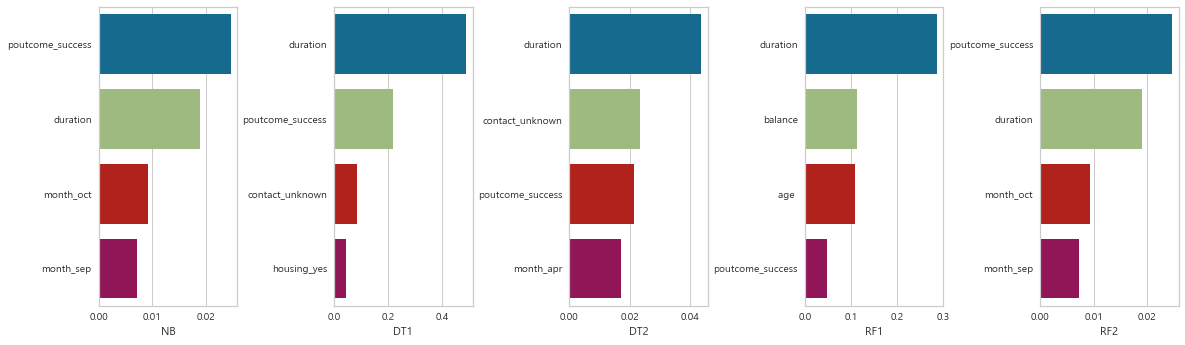

In [234]:
plt.figure(figsize = (20,5))
fig,axes=plt.subplots(1,5)
sns.barplot(ax=axes[0],x= df_nb["중요도"][:4],y = df_nb.index[:4])
axes[0].set_xlabel("NB")
sns.barplot(ax=axes[1],x= df_tree1["중요도"][:4],y = df_tree1.index[:4])
axes[1].set_xlabel("DT1")
sns.barplot(ax=axes[2],x= df_tree2["중요도"][:4],y = df_tree2.index[:4])
axes[2].set_xlabel("DT2")
sns.barplot(ax=axes[3],x= df_rf1["중요도"][:4],y = df_rf1.index[:4])
axes[3].set_xlabel("RF1")
sns.barplot(ax=axes[4],x= df_rf2["중요도"][:4],y = df_rf2.index[:4])
axes[4].set_xlabel("RF2")
plt.subplots_adjust(right = 2,wspace = 0.7)


각 모델별로 고객의 정기예금 상품가입여부를 결정 짓는 중요변수 상위 4개를 추출해보면 공통적으로 포함된 2개의 변수가 존재하는데, 바로 '이전 캠페인에서의 가입여부'와'고객과의 접촉시간'이다. 그렇다면 정기예금 상품을 가입한 고객과 그렇지 않은 고객의 두 변수 값이 어떠한 차이를 보이는지 파악한다면 유의미한 마케팅 전략을 세울 수 있을것이다.

In [124]:
#y를 이진변수로 변화시켜 mean함수를 적용하여 정기예금 상품 가입률을 바로 도출한다.
change_target = {"yes":1,"no":0}
bank_df["y"] = bank_df["y"].apply(lambda x: change_target[x])


In [128]:
poutcome_y= bank_df.groupby("poutcome").mean()
poutcome_y

,age,balance,duration,campaign,previous,y
poutcome,,,,,,
failure,40.786166,1465.805550,244.185880,1.980820,2.896552,0.126097
other,39.752174,1487.411413,255.715217,2.461413,4.009239,0.166848
success,42.964924,1939.301125,316.868961,1.806089,3.075447,0.647253
unknown,40.932114,1318.722043,257.738332,2.921886,0.000460,0.091615


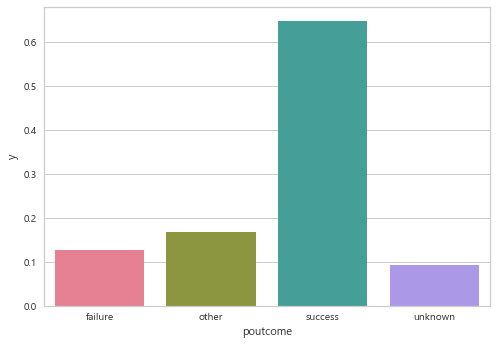

In [142]:
sns.barplot(poutcome_y.index,poutcome_y["y"],palette="husl")

고객층을 이전 캠페인에서 정기예금 상품 가입여부에따라 나누어 그룹별로 본 캠페인의 상품가입률을 살펴보면, 이전 캠페인에서 상품에 가입한 고객일 수록 현재 캠페인에서도 상품을 가입할 확률이 훨씬 높다는 것을 알 수 있다. 따라서 마케팅 캠페인을 진행함에 있어서 이전 캠페인에서 상품에 가입했던 고객들을 주 타켓층으로 하여 이들을 대상으로 집중적으로 마케팅을 진행한다면 마케팅 성과를 좀 더 높일 수 있지 않을까 생각한다.

In [213]:
# 상품가입여부에 따라 그룹을 나눈뒤 접촉시간을 비교한다.
y_duration = bank_df.groupby("y").mean()["duration"]
print(y_duration)


y
0    221.182806
1    537.294574
Name: duration, dtype: float64


In [155]:
bank_df["duration"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [207]:
new_bank= bank_df[bank_df["duration"]<(319-103)*1.5] #극단치 제거
bins = np.arange(0,350,50)
bank_df["level"]=pd.cut(new_bank["duration"],bins)
du_y= bank_df.groupby("level").mean()
du_y

,age,balance,duration,campaign,previous,y
level,,,,,,
"(0, 50]",40.440133,1304.388304,28.076774,5.369457,0.694013,0.002494
"(50, 100]",41.539741,1320.692794,77.131876,2.972085,0.465209,0.014851
"(100, 150]",41.216772,1314.940857,124.906691,2.591044,0.506147,0.040896
"(150, 200]",41.004312,1322.159853,173.932290,2.433088,0.614340,0.072501
"(200, 250]",40.625483,1365.072072,224.295796,2.359288,0.586444,0.105749
"(250, 300]",40.593300,1350.425801,273.946224,2.366441,0.634440,0.132530


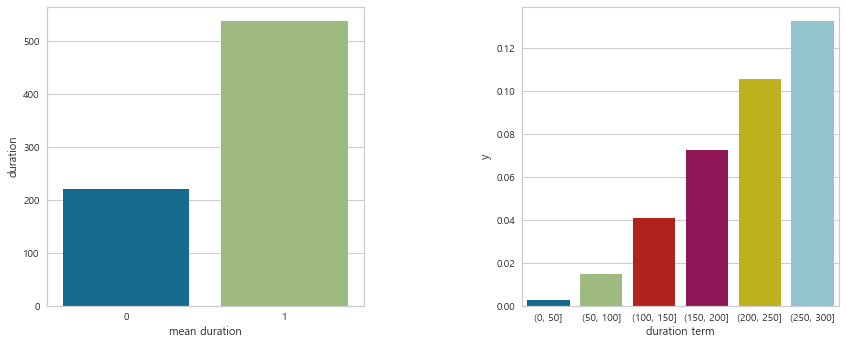

In [233]:
fig,axes=plt.subplots(1,2)
sns.barplot(ax=axes[0],x=y_duration.index,y=y_duration)
axes[0].set_xlabel("mean duration")
sns.barplot(ax=axes[1],y=du_y["y"],x=du_y.index)
axes[1].set_xlabel("duration term")
plt.subplots_adjust(right =1.5,wspace = 0.5)

위 그래프와 같이 정기예금을 가입한 고객의 평균 접촉시간이 그렇지 않은 고객보다 2배가량 높으며 평균 접촉시간이 높은 그룹일수록 정기예금 상품가입률이 더 높은 것을 확인할 수 있다. 따라서 마케팅 캠페인을 진행하는데 있어서 고객과의 접촉이 이루어졌을때 접촉시간이 긴 고객일 수록 더 적극적인 홍보를 한다면 상품 가입률을 더 증가시킬 수 있을것으로 기대한다.

결론적으로 해당 데이터 분석을 진행함으로써 향후 마케팅 캠페인을 진행하는데 참고할 만한 인사이트는 기존에 동일한 은행의 상품에 가입한 고객일수록 동일한 은행의 다른 상품에도 가입할 확률이 높다는 것 즉,신념보존 편향이 존재한다는 것이다. 이는 기존고객에게 각종 프로모션과 혜택을 제공함으로써 상품 재구매를 증진시키고 고객 이탈을 방지할 수 있는 이점이 있으나, 다른한편으론 신규고객을 유치하기위해서는 기존고객보다 훨씬 더 많은 노력과 비용을 수반한다는 것을 뜻한다.그래서 마케팅 켐페인이 신규고객유입을 통한 시장확장을 목적으로 한다면 훨씬 더 많은 비용이따른다는 것을 고려해야한다. 그리고 고객의 접촉시간은 상품가입에 대한 고객의 의사를 간접적으로 파악할 수 있는 중요지표이다. 고객이 특정 상품에 관심이있다면 당연히 상품에대해 보다 구체적인 정보를 필요로 할것이고 접촉시간은 자연스레 늘어날 것이다. 따라서 이전에 접촉시간이 다른 고객대비 길었던 고객들을 대상으로 리마케팅을 진행함으로써 상품구매를  재유인할 필요가 있다. 